# Objectives

Some problems involve rearranging a fixed set of objects. Any such problems go here.

In [1]:
import random as r
import numpy as np
import matplotlib.pyplot as plt
from math import hypot

## Random Search

In [2]:
class RandomSearch:
    def __init__(
        self,
        N
    ):
        self.N = N
        
    def generateRandomHypothesis(self):
        output = [c for c in range(self.N)]
        r.shuffle(output)
        return(output)
    
    def optimize(self,
                objectiveFunction,
                numIterations = 25000):
        bestX = None
        bestY = -float("inf")
        for i in range(numIterations):
            newX = self.generateRandomHypothesis()
            newY = objectiveFunction(newX)
            if newY > bestY:
                bestX = newX
                bestY = newY
        return(bestX)

## Travelling Salesman

A classic of optimization, the challenge is this: we have N towns in (-R, R), and must travel to all of the towns starting from any town we choose, and return to our starting town. What is the most efficient order to travel through all the towns such that we minimize our total distance travelled?

Town: 0 [9.266324616950204, 6.365047274129779]
Town: 1 [-9.975219226810086, 8.999396999117707]
Town: 2 [-6.270256921480339, 5.997563250480571]
Town: 3 [0.27126779427700853, 6.374274275290482]
Town: 4 [7.492801292760074, 1.098941957840589]
Town: 5 [-8.474819097144033, 1.5223429821231154]
Town: 6 [2.5874664182536815, 1.0567465013921087]
Town: 7 [-2.3452121551437966, -5.007922644508209]
Town: 8 [0.08281451562664977, 8.676423384808302]
Town: 9 [5.405749421225693, -3.149391851021366]
Path: [2, 8, 3, 0, 4, 9, 6, 7, 5, 1] Total Distance Travelled: 62.72101310152107


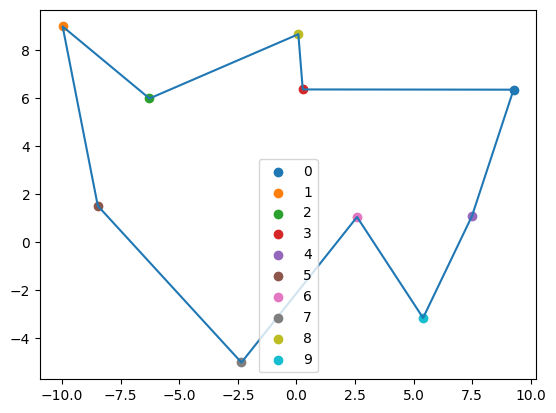

In [3]:
N = 10
R = 10

def travellingSalesmanSetup(N):
    return([[r.uniform(-R, R), r.uniform(-R, R)] for c in range(N)])

towns = travellingSalesmanSetup(N)
for i in range(N):
    print("Town:", str(i), towns[i])
import matplotlib.pyplot as plt
for i in range(len(towns)):
    town = towns[i]
    plt.scatter(town[0], town[1], label = i)
plt.legend()

def salesmanReward(x):
    d = 0
    for i in range(len(x)):
        a = towns[x[i]]
        b = towns[x[(i + 1) % len(x)]]
        d += hypot(b[0] - a[0], b[1] - a[1])
    return(-d)

rs = RandomSearch(N)
path = rs.optimize(salesmanReward, numIterations = 10 ** 5)
print("Path:", path, "Total Distance Travelled:", -salesmanReward(path))
xs = [towns[i][0] for i in path] + [towns[path[0]][0]]
ys = [towns[i][1] for i in path] + [towns[path[0]][1]]
plt.plot(xs, ys)
plt.show()

## Dinner Table Problem

Suppose you have N coworkers and a matrix where the ijth element tells you how much person i likes person j. Then, we must seat all these people around a circular table. So the utility of the ordering is the sum of the matrix values for adjacent people.

In [8]:
N = 15
friendshipMatrix = np.random.randint(-10, 11, size = (N, N))
print(friendshipMatrix)

def seatingValue(x):
    output = friendshipMatrix[x[0]][x[-1]] + friendshipMatrix[x[-1]][x[0]]
    output += sum(friendshipMatrix[x[i]][x[i + 1]] + friendshipMatrix[x[i + 1]][x[i]] for i in range(len(x) - 1))
    return(output)

rs = RandomSearch(N)
arrangement = rs.optimize(seatingValue, numIterations = 10 ** 3)
print("Chosen arrangement:", arrangement)
print("Average friendliness in arrangement", seatingValue(arrangement) / N)

[[-10 -10   5  -1   1  -7   3  -5  -5  -7   1  -2  -9  -5   7]
 [ -9   1  -3  -9  -6  -7   8  -2   5  -2   8   1   5   1   4]
 [ -2  10   9  -8  -4  -4   8  -5   3   3  -6   4 -10   1   0]
 [ -6   6  -8  -8 -10  -7  -5  10 -10  -2  -1  -4   7   3  -6]
 [ -8   9   9   7   2  -4 -10   7  -8  -3   8 -10   3  -7   8]
 [ -3  10   8   5  -4  -4   9  -4   5  10   7  -1  -7   4  -6]
 [ -1   5   4   4  -5  -2   1  -9   3  -3  -8   5  -7   6  -4]
 [  6   7   8  -4  -4  -5   2   0  -4  -9   8  -3  -9  -5  -8]
 [-10  -8  -6   7  -5   5   2   3   0   9   3   9   2  -8   7]
 [  7  -3   7   2  -4   5   9  -6   1  -4  -5  -9 -10  -6   6]
 [  7  -1   0  -5  -6  10   8  -7   4 -10  -1   0 -10  10  -5]
 [-10   5   5  -5  10   0  -6   1   5  -8  -6   3  10   1  -2]
 [  5   8   8  -3  -2   1  -7   1  -7  -7  -7   6  -3   2   6]
 [  7  -9  -6   2   4  -3   3  -6   1  -5  -3  -2  -2  -4   9]
 [ -5  -3  -8  -2   9   6   5 -10 -10   3   0  10   2   0  -8]]
Chosen arrangement: [5, 6, 13, 10, 11, 4, 14, 0, 7, 2,